In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

#anaemia: 1=yes 0=no
#diabetes: 1=yes 0=no
#high_blood_pressure: 1=yes 0=no
#sex: 1=man, 0=woman
#smoking: 1=smoking 0=non-smoking
#DEATH_EVENT: 1=died, 0=survived

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [48]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [52]:
# df.describe(include=[categorical])

df.astype('object').describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.0,299,299,299,299,299,299.00,299.0,299,299,299,299,299
unique,47.0,2,208,2,17,2,176.00,40.0,27,2,2,148,2
top,60.0,0,582,0,35,0,263358.03,1.0,136,1,0,187,0
freq,33.0,170,47,174,49,194,25.00,50.0,40,194,203,7,203


In [54]:
#Lets look at sex vs. death

sex_death = df[["sex","DEATH_EVENT"]]
sex_death = pd.crosstab(df["sex"], df["DEATH_EVENT"])
sex_death

DEATH_EVENT,0,1
sex,,
0,71,34
1,132,62


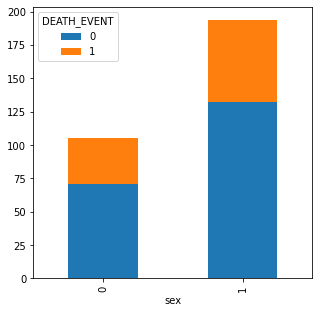

In [55]:
#Doesn't seem to be a significant difference
plt.rcParams['figure.figsize'] = [5, 5]
sex_death.plot.bar(stacked=True)
plt.show()

In [56]:
#Lets look at smoking vs. death

smoking_death = df[["smoking","DEATH_EVENT"]]
smoking_death = pd.crosstab(df["smoking"], df["DEATH_EVENT"])
smoking_death

DEATH_EVENT,0,1
smoking,,
0,137,66
1,66,30


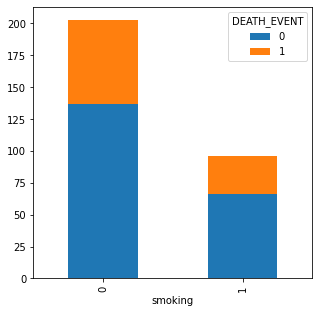

In [57]:
#Doesn't seem to be a significant difference again
plt.rcParams['figure.figsize'] = [5, 5]
smoking_death.plot.bar(stacked=True)
plt.show()

In [58]:
#Lets look at diabetes vs. death

diabetes_death = df[["diabetes","DEATH_EVENT"]]
diabetes_death = pd.crosstab(df["diabetes"], df["DEATH_EVENT"])
diabetes_death

DEATH_EVENT,0,1
diabetes,,
0,118,56
1,85,40


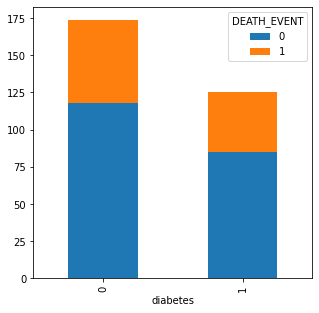

In [59]:
#Doesn't seem to be a significant difference again
plt.rcParams['figure.figsize'] = [5, 5]
diabetes_death.plot.bar(stacked=True)
plt.show()

In [60]:
#Lets look at blood pressure vs. death

hbp_death = df[["high_blood_pressure","DEATH_EVENT"]]
hbp_death = pd.crosstab(df["high_blood_pressure"], df["DEATH_EVENT"])
hbp_death

DEATH_EVENT,0,1
high_blood_pressure,,
0,137,57
1,66,39


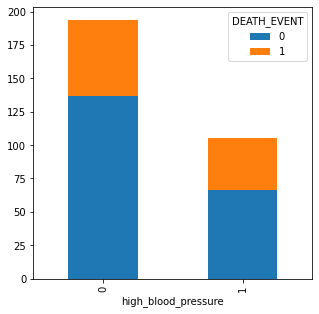

In [61]:
#The signigicance is a bit more significant here
plt.rcParams['figure.figsize'] = [5, 5]
hbp_death.plot.bar(stacked=True)
plt.show()

In [68]:
#let's try a chi square test for hbp
from scipy.stats import chi2_contingency 


chisqt = pd.crosstab(df.high_blood_pressure, df.DEATH_EVENT, margins=True)
value = np.array([chisqt.iloc[0][0:2].values,
                  chisqt.iloc[1][0:2].values])
print(chi2_contingency(value)[0:3])

#p value is too high so we do not have evidence to reject the null hypothesis

(1.5434607612967581, 0.21410341199416902, 1)


In [69]:
#Lets look at anaemia vs. death

an_death = df[["anaemia","DEATH_EVENT"]]
an_death = pd.crosstab(df["anaemia"], df["DEATH_EVENT"])
an_death

DEATH_EVENT,0,1
anaemia,,
0,120,50
1,83,46


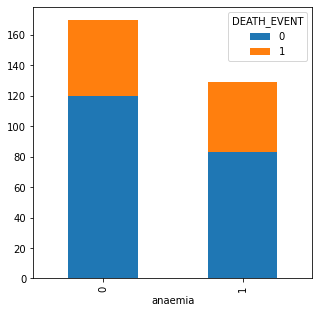

In [70]:
#It could be significant so we will do a chi square test again
plt.rcParams['figure.figsize'] = [5, 5]
an_death.plot.bar(stacked=True)
plt.show()

In [71]:
#chi square test

chisqt = pd.crosstab(df.anaemia, df.DEATH_EVENT, margins=True)
value = np.array([chisqt.iloc[0][0:2].values,
                  chisqt.iloc[1][0:2].values])
print(chi2_contingency(value)[0:3])

#p value is too high again, so we do not have evidence to reject the null hypothesis

(1.042175485287005, 0.3073160508415107, 1)


In [26]:
#lets separate the data into two dataframes, one for lived, one for died so that we can perform different tests
#on non-categorical attributes

df_died = df[df['DEATH_EVENT']==1]
df_died

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
230,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1
246,55.0,0,2017,0,25,0,314000.00,1.10,138,1,0,214,1
262,65.0,1,258,1,25,0,198000.00,1.40,129,1,0,235,1


In [27]:
df_lived = df[df['DEATH_EVENT']==0]
df_lived

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
33,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29,0
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0


In [72]:
#Perform two-sample t-test to find significance of creatinine_phosphokinase on death

stats.ttest_ind(a=df_died['creatinine_phosphokinase'], b=df_lived['creatinine_phosphokinase'], equal_var=False)

#Our p-value is too high to reject the null hypothesis, cp is not significant

Ttest_indResult(statistic=0.9011899891683772, pvalue=0.36921596064201445)

In [73]:
#Perform two-sample t-test to find significance of platelets on death

stats.ttest_ind(a=df_died['platelets'], b=df_lived['platelets'], equal_var=False)

#Our p-value is too high to reject the null hypothesis, platelets are not significant

Ttest_indResult(statistic=-0.8447853436182764, pvalue=0.39932313208796466)

In [74]:
#Perform two-sample t-test to find significance of serum_sodium on death

stats.ttest_ind(a=df_died['serum_sodium'], b=df_lived['serum_sodium'], equal_var=False)

#Our p-value is low, we can reject the null hypothesis

Ttest_indResult(statistic=-3.1645011835006565, pvalue=0.001872324830123234)

In [76]:
#We will also do a one tail t test

ss_lived_mean = df_lived['serum_sodium'].mean()

ss_lived_mean

137.2167487684729

In [77]:
ss_died_mean = df_died['serum_sodium'].mean()

ss_died_mean

135.375

In [192]:
#We want to discover if ss is significantly lower in those who died vs lived

ss_df_mean = df['serum_sodium'].mean()
print(ss_df_mean)
test_2 = stats.ttest_1samp(df_died['serum_sodium'], ss_df_mean)

test_2

#We can still reject the null hypothesis with the one-tail t-test

136.62541806020067


Ttest_1sampResult(statistic=-2.449535554677279, pvalue=0.016136213191087746)

In [447]:
#For the sake of the next part of the EDA, we will be focusing more closely on the attributes ejection_fraction, 
#serum_creatinine, and age vs DEATH_EVENT.

#ejection_fraction (ef) and serum_creatinine (sc) were the two attributes that the official research paper based on 
#this data found to be significant as there is a lot of data and I would like to do a more in depth analysis on these
#attributes. I would also like to see if age plays a role in a patient's death.

#We are going to start our analysis with age vs. death event

age_death = df[["age","DEATH_EVENT"]]
age_death = pd.crosstab(df["age"], df["DEATH_EVENT"])
age_death

DEATH_EVENT,0,1
age,,
40.000,7,0
41.000,1,0
42.000,6,1
43.000,1,0
44.000,2,0
45.000,13,6
46.000,2,1
47.000,1,0
48.000,0,2


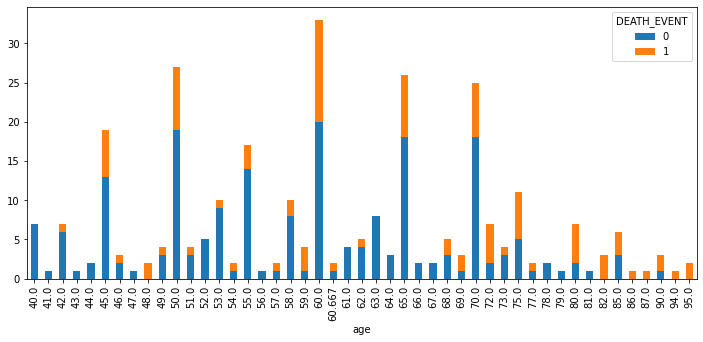

In [448]:
##Create histogram for each attribute
sum_death = df.DEATH_EVENT.value_counts()


# plt.figure()
# age_graph = sum_death.plot(kind='bar')
# age_graph.set_title("Bar Graph of Age vs. Death")
# age_graph.set_ylabel("Count")
# plt.show()


# hist_age = df.age.hist()
# hist_age.set_xlabel("Age",fontsize=20)
# hist_age.set_ylabel("Counts",fontsize=20)
# hist_age.set_title("Histogram of Ages",fontsize=20)

# plt.figure(figsize=(10,10))

plt.rcParams['figure.figsize'] = [12, 5]
age_death.plot.bar(stacked=True)
plt.show()

In [449]:
from scipy.stats import f_oneway


#Use one way ANOVA test to see how much of an impact age has on patient death
CategoryGroupLists=df.groupby('age')['DEATH_EVENT'].apply(list)

AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.008725223014233067


In [450]:
#Find the mean of age for people who died vs. lived

died_age_mean = df_died['age'].mean()
lived_age_mean = df_lived['age'].mean()

print(died_age_mean)
print(lived_age_mean)

#The mean age is lower for those who lived

65.21528125
58.76190640394089


In [451]:
#Find the std of age for people who died vs. lived

died_age_std = df_died['age'].std()
lived_age_std = df_lived['age'].std()

print(died_age_std)
print(lived_age_std)

#The standard deviation for those who lived is also smaller, though, meaning there is more variance 
#in age among those who died

13.214555639583372
10.637890226515534


In [452]:
#find variance for each group
print(np.var(df_died['age']), np.var(df_lived['age']))

#We have significant variance, so we need to set equal_val to false for our next step

172.80547574381504 112.60724685330901


In [453]:
#Perform two-sample t-test to find significance of age on death (this is automatically a two-tail test)

stats.ttest_ind(a=df_died['age'], b=df_lived['age'], equal_var=False)

#We have a high t-statistic and low pvalue, so there is significant evidence to reject the null hypothesis

Ttest_indResult(statistic=4.186210205663688, pvalue=4.735214517659265e-05)

In [454]:
#We want to discover if age is significantly higher in those who died vs lived, so we will also do a one-tail test

age_df_mean = df['age'].mean()
print(age_df_mean)

test_2 = stats.ttest_1samp(df_died['age'], age_df_mean)

test_2

#We can still reject the null hypothesis with the one-tail t-test

60.83389297658862


Ttest_1sampResult(statistic=3.2485891853144464, pvalue=0.0016039749982158973)

In [455]:
#Now we will continue our analysis with ef. Ef refers to the fraction at which the heart is pumping blood.
#A lower ef means that the heart is pumping less blood. We want to see what role ef plays in death

ef_death = df[["ejection_fraction","DEATH_EVENT"]]
ef_death = pd.crosstab(df["ejection_fraction"], df["DEATH_EVENT"])
ef_death

DEATH_EVENT,0,1
ejection_fraction,,
14,0,1
15,0,2
17,1,1
20,2,16
25,18,18
30,21,13
35,42,7
38,25,15
40,33,4


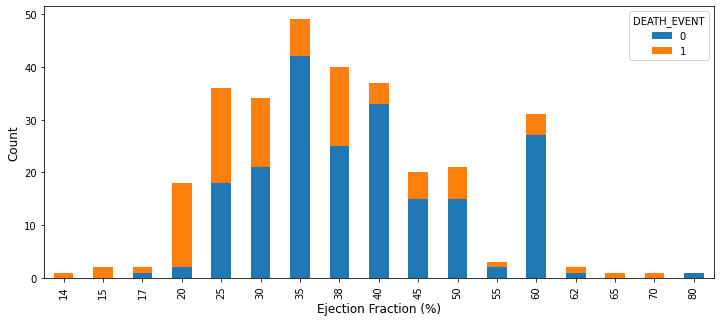

In [471]:
#Lets make a stacked bar chart to see the ef comparison between those who died and those who did not

ef_death.plot.bar(stacked=True)
plt.xlabel('Ejection Fraction (%)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#It seem that the lower the ef, the more likely it is that a patient dies.

In [457]:
#EF outlier test

ef_mean = df['ejection_fraction'].mean()
ef_mean

38.08361204013378

In [458]:
ef_std = df['ejection_fraction'].std()
ef_std

11.834840741039173

In [459]:
#Use one way ANOVA test to see how much of an impact ef has on patient death
CategoryGroupLists=df.groupby('ejection_fraction')['DEATH_EVENT'].apply(list)

AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

#We get a very low p-value with the ANOVA test, meaning that we have significant proof to reject the null hypothesis

P-Value for Anova is:  6.130271029984933e-09


In [460]:
#Lets look at the means and std for those who died vs. lived

ef_died_mean = df_died['ejection_fraction'].mean()
ef_lived_mean = df_lived['ejection_fraction'].mean()

print(ef_died_mean)
print(ef_lived_mean)

#The mean for those who died is lower

33.46875
40.26600985221675


In [461]:
#Let's check std

ef_died_std = df_died['ejection_fraction'].std()
ef_lived_std = df_lived['ejection_fraction'].std()

print(ef_died_std)
print(ef_lived_std)

#Again, however, the std for those who died is larger meaning the data has more variance

12.52530333701386
10.859962681586294


In [462]:
#find variance for each group
print(np.var(df_died['ejection_fraction']), np.var(df_lived['ejection_fraction']))

#We have significant variance again, albeit less, so we need to set equal_val to false for our next step

155.2490234375 117.35781018709503


In [463]:
#Perform two-sample t-test to find significance of ef on death

stats.ttest_ind(a=df_died['ejection_fraction'], b=df_lived['ejection_fraction'], equal_var=False)

#We have a high t-statistic and low pvalue, so there is significant evidence to reject the null hypothesis. 
#We can say that those who died have an ef that is significantly different from those who lived.

Ttest_indResult(statistic=-4.56698316342773, pvalue=9.647152798521775e-06)

In [464]:
#We want to also do a one tail t test to see if ef is significantly lower in those who died

test_2 = stats.ttest_1samp(df_died['ejection_fraction'], ef_lived_mean)

test_2

#We can still reject the null hypothesis with the one-tail t-test

Ttest_1sampResult(statistic=-5.3171784631624845, pvalue=6.974120244970528e-07)

In [465]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [466]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [467]:
x = df[['serum_creatinine','ejection_fraction']]
x

,serum_creatinine,ejection_fraction
0,1.9,20
1,1.1,38
2,1.3,20
3,1.9,20
4,2.7,20
...,...,...
294,1.1,38
295,1.2,38
296,0.8,60
297,1.4,38


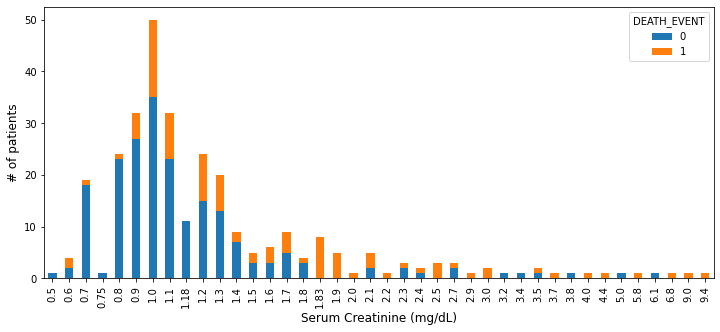

In [470]:
sc_death.plot.bar(stacked=True)
plt.xlabel('Serum Creatinine (mg/dL)', fontsize=12)
plt.ylabel('# of patients', fontsize=12)
plt.show()

In [293]:
y = df['DEATH_EVENT']
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [306]:
# model.fit(df['ejection_fraction'], df['DEATH_EVENT'])


logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred=logmodel.predict(X_test)
# predictions = logmodel.predict(X_test)

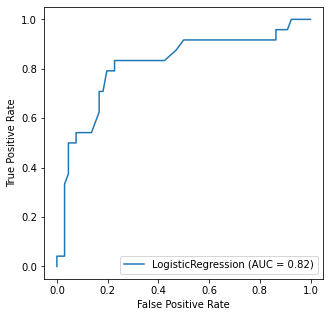

In [307]:
#plot the roc curve

from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

plot_roc_curve(logmodel, X_test, y_test)

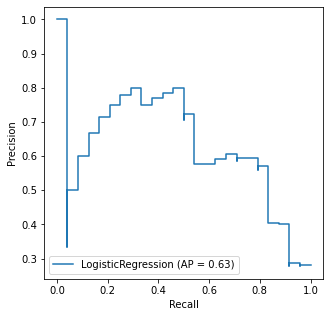

In [312]:
plot_precision_recall_curve(logmodel, X_test, y_test)

In [313]:
coefficients = np.hstack((logmodel.intercept_, logmodel.coef_[0]))
coefficients

array([ 0.32032117,  0.72719078, -0.05309406])

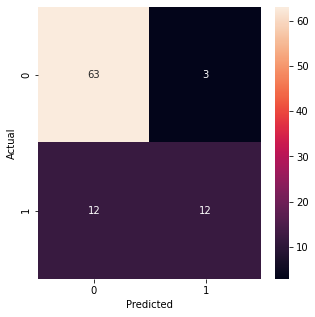

In [310]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [311]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8333333333333334


In [469]:
#Now we will look at our attribute serum_creatinine, or sc, to see if it is significant with regards to patient death.
#prepare dataframe to create stacked bar chart


sc_death = df[["serum_creatinine","DEATH_EVENT"]]
sc_death = pd.crosstab(df["serum_creatinine"], df["DEATH_EVENT"])
sc_death

DEATH_EVENT,0,1
serum_creatinine,,
0.50,1,0
0.60,2,2
0.70,18,1
0.75,1,0
0.80,23,1
0.90,27,5
1.00,35,15
1.10,23,9
1.18,11,0


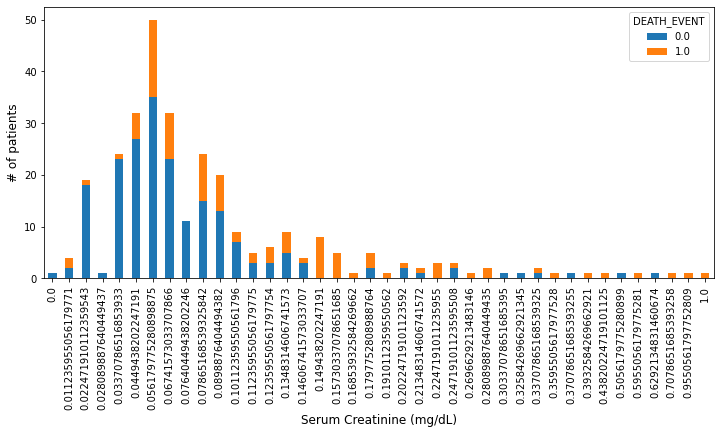

In [468]:
#create stacked bar chart

sc_death.plot.bar(stacked=True)
plt.xlabel('Serum Creatinine (mg/dL)', fontsize=12)
plt.ylabel('# of patients', fontsize=12)
plt.show()

#It looks like sc in those who died tends to be higher

In [385]:
#Binning with SC
#Unsupervised binning

min_value = df['serum_creatinine'].min()
max_value = df['serum_creatinine'].max()

In [389]:
bins = np.linspace(min_value,max_value,4)
bins

array([0.5       , 3.46666667, 6.43333333, 9.4       ])

In [390]:
labels = ['small', 'medium', 'big']

In [391]:
df['bins'] = pd.cut(df['serum_creatinine'], bins=bins, labels=labels, include_lowest=True)

Text(0, 0.5, '# of Patients')

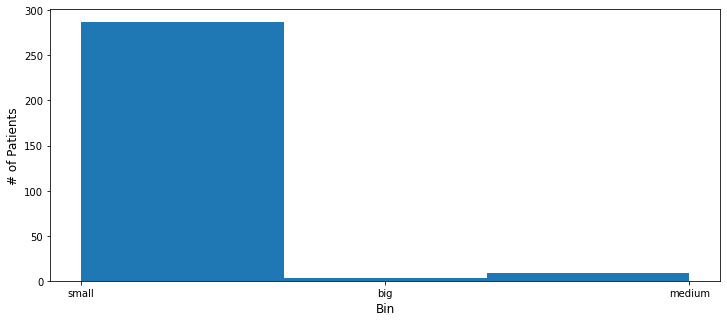

In [477]:
plt.hist(df['bins'], bins=3)
plt.xlabel('Bin', fontsize=12)
plt.ylabel('# of Patients', fontsize=12)

In [408]:
big_df = df[df['bins'] == 'big']
big_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,bins
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1,big
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1,big
217,54.0,1,427,0,70,1,151000.00,9.0,137,0,0,196,1,big


In [410]:
#natural breaks binning

import jenkspy
breaks = jenkspy.jenks_breaks(df['serum_creatinine'], nb_class=3)

In [411]:
df['bin_cut_break'] = pd.cut(df['serum_creatinine'] , bins=breaks, labels=labels, include_lowest=True)

Text(0, 0.5, '# of Patients')

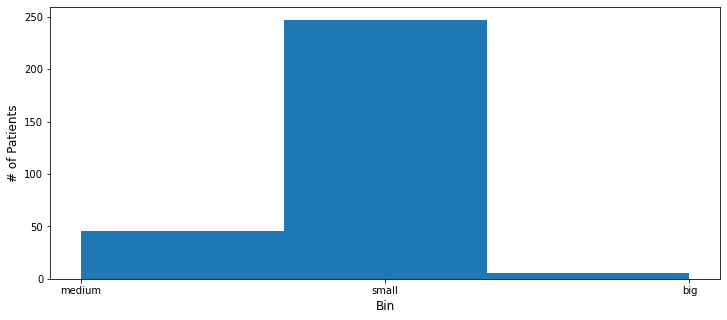

In [478]:
plt.hist(df['bin_cut_break'], bins=3)
plt.xlabel('Bin', fontsize=12)
plt.ylabel('# of Patients', fontsize=12)

In [424]:
big_df = df[df['bin_cut_break'] == 'big']
medium_df = df[df['bin_cut_break'] == 'medium']
small_df = df[df['bin_cut_break'] == 'small']

big_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,bins,bin_cut_break
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1,big,big
28,58.0,1,60,0,38,0,153000.00,5.8,134,1,0,26,1,medium,big
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1,big,big
131,60.0,1,1082,1,45,0,250000.00,6.1,131,1,0,107,0,medium,big
217,54.0,1,427,0,70,1,151000.00,9.0,137,0,0,196,1,big,big
228,65.0,0,56,0,25,0,237000.00,5.0,130,0,0,207,0,medium,big


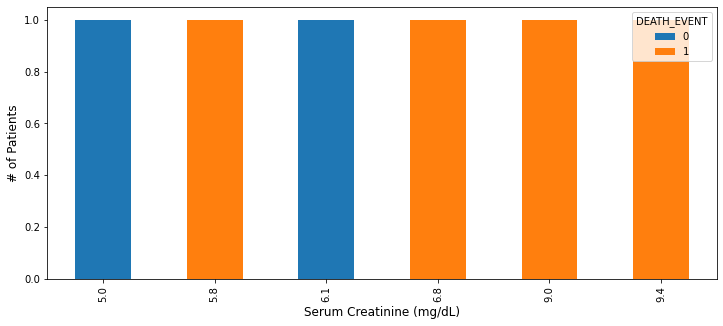

1    4
0    2
Name: DEATH_EVENT, dtype: int64

In [479]:
big1 = big_df[["serum_creatinine","DEATH_EVENT"]]
big1 = pd.crosstab(big_df["serum_creatinine"], big_df["DEATH_EVENT"])
big1

big1.plot.bar(stacked=True)
plt.xlabel('Serum Creatinine (mg/dL)', fontsize=12)
plt.ylabel('# of Patients', fontsize=12)
plt.show()
big_df['DEATH_EVENT'].value_counts()

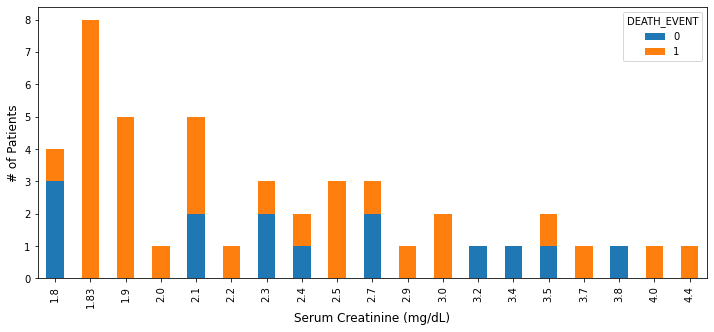

1    32
0    14
Name: DEATH_EVENT, dtype: int64

In [480]:
medium1 = medium_df[["serum_creatinine","DEATH_EVENT"]]
medium1 = pd.crosstab(medium_df["serum_creatinine"], medium_df["DEATH_EVENT"])
medium1

medium1.plot.bar(stacked=True)
plt.xlabel('Serum Creatinine (mg/dL)', fontsize=12)
plt.ylabel('# of Patients', fontsize=12)
plt.show()

medium_df['DEATH_EVENT'].value_counts()

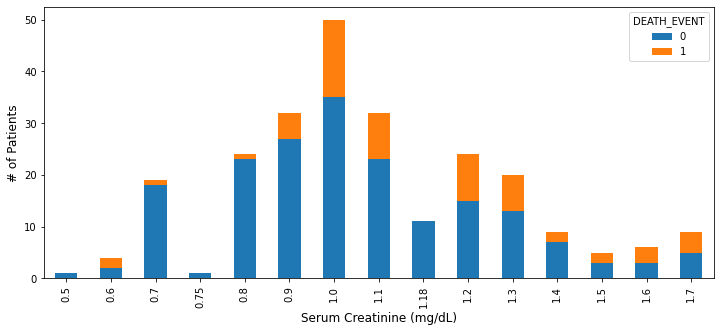

0    187
1     60
Name: DEATH_EVENT, dtype: int64

In [482]:
small1 = small_df[["serum_creatinine","DEATH_EVENT"]]
small1 = pd.crosstab(small_df["serum_creatinine"], small_df["DEATH_EVENT"])
small1

small1.plot.bar(stacked=True)
plt.xlabel('Serum Creatinine (mg/dL)', fontsize=12)
plt.ylabel('# of Patients', fontsize=12)
plt.show()

small_df['DEATH_EVENT'].value_counts()

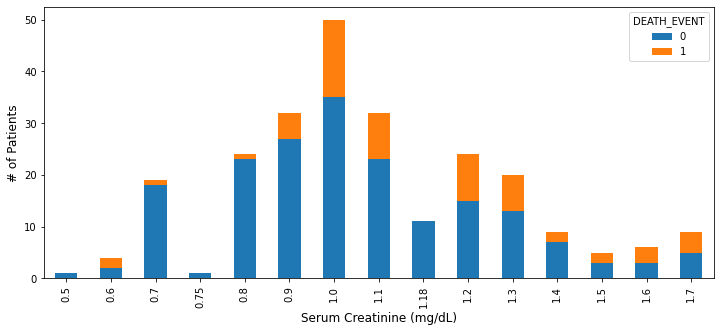

0    187
1     60
Name: DEATH_EVENT, dtype: int64

In [485]:
small1 = small_df[["serum_creatinine","DEATH_EVENT"]]
small1 = pd.crosstab(small_df["serum_creatinine"], small_df["DEATH_EVENT"])
small1

small1.plot.bar(stacked=True)
plt.xlabel('Serum Creatinine (mg/dL)', fontsize=12)
plt.ylabel('# of Patients', fontsize=12)
plt.show()

small_df['DEATH_EVENT'].value_counts()

In [545]:
from sklearn.preprocessing import MinMaxScaler


plt.rcParams['figure.figsize'] = [10, 5]
X = df[['serum_creatinine','DEATH_EVENT']]

# define min max scaler
scaler = MinMaxScaler()
# transform data
# fit using the train set
scaler.fit(X)
# transform the test test
X_scaled = scaler.transform(X)
# Verify minimum value of all features
X_scaled.min(axis=0)
# array([0., 0., 0., 0.])
# Verify maximum value of all features
X_scaled.max(axis=0)
# array([1., 1., 1., 1.])
# Manually normalise without using scikit-learn
X_manual_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# Verify manually VS scikit-learn estimation
print(np.allclose(X_scaled, X_manual_scaled))
#True

print(X_manual_scaled)

sc_death = X_manual_scaled[["serum_creatinine","DEATH_EVENT"]]
sc_death = pd.crosstab(X_manual_scaled["serum_creatinine"], X_manual_scaled["DEATH_EVENT"])
sc_death

# sc_death.plot.bar(stacked=True)

plt.bar(range(len(sc_death['serum_creatinine'])), sorted(sc_death['serum_creatinine']), color='red', alpha=0.5)
plt.rcParams['figure.figsize'] = [10, 5]
plt.xlabel('Serum Creatinine min-max', fontsize=14)
plt.ylabel('# of Patients', fontsize=14)
plt.show()


print(X_manual_scaled.mean())
print(X_manual_scaled.std())


X_manual_scaled = pd.DataFrame(X_manual_scaled)


X_manual_scaled

X_died = X_manual_scaled[X_manual_scaled['DEATH_EVENT'] == 1]
X_lived = X_manual_scaled[X_manual_scaled['DEATH_EVENT'] == 0]


X_died
sc_died_mean = X_died['serum_creatinine'].mean()
sc_lived_mean = X_lived['serum_creatinine'].mean()


sc_died_std = X_died['serum_creatinine'].std()
print(sc_died_mean)
print(sc_died_std)
print(sc_lived_mean)

True
     serum_creatinine  DEATH_EVENT
0            0.157303          1.0
1            0.067416          1.0
2            0.089888          1.0
3            0.157303          1.0
4            0.247191          1.0
..                ...          ...
294          0.067416          0.0
295          0.078652          0.0
296          0.033708          0.0
297          0.101124          0.0
298          0.123596          0.0

[299 rows x 2 columns]


KeyError: 'serum_creatinine'

ValueError: shape mismatch: objects cannot be broadcast to a single shape

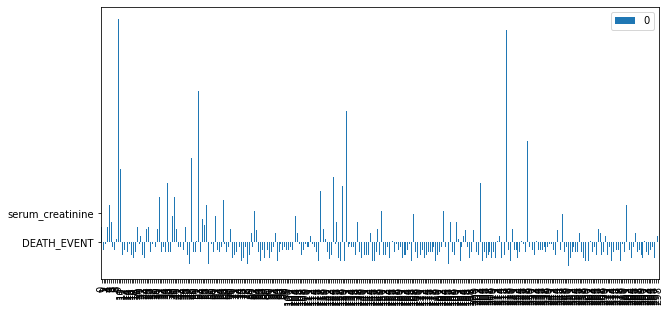

In [547]:
#Z-score standardization

sc_z = stats.zscore(df['serum_creatinine'])

sc_z = pd.DataFrame(sc_z)
sc_z.plot.bar(stacked=True)
plt.bar(range(len(X_manual_scaled)), sorted(X_manual_scaled), color='red', alpha=0.5)
plt.rcParams['figure.figsize'] = [5, 10]
plt.xlabel('Serum Creatinine (mg/dL) z-score', fontsize=12)
plt.ylabel('# of standard deviations', fontsize=12)
plt.show()

sc_z

sc_z_mean = sc_z['serum_creatinine'].mean()
sc_z_mean

sc_z_std = sc_z['serum_creatinine'].std()
sc_z_mean

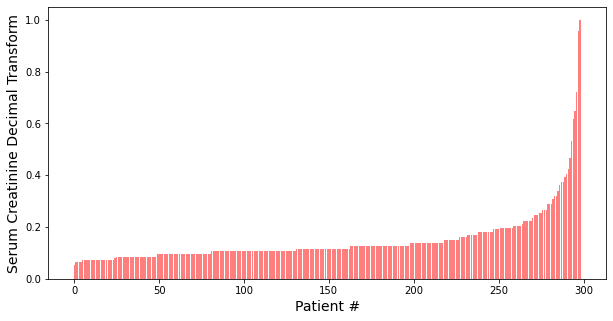

In [504]:
sc_dec = df['serum_creatinine']/9.4

sc_dec
# key = sc_dec
# sc_dec.iloc[key.argsort()]

# sc_dec.plot.bar(stacked=True)
plt.xlabel('Patient #', fontsize=14)
plt.ylabel('Serum Creatinine Decimal Transform', fontsize=14)
plt.bar(range(len(sc_dec)), sorted(sc_dec), color='red', alpha=0.5)

plt.show()

In [490]:
sc_dec_mean = sc_dec.mean()
sc_dec_std = sc_dec.std()
print(sc_dec_mean)
sc_dec_std



0.14828506368746833


0.11005426213721854

In [43]:
#Use one way ANOVA test to see how much of an impact sc has on patient death
CategoryGroupLists=df.groupby('serum_creatinine')['DEATH_EVENT'].apply(list)

AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

#We get a very low p-value with the ANOVA test, meaning that we have significant proof to reject the null hypothesis

P-Value for Anova is:  1.3847425994853355e-07


In [44]:
#Lets look at the means and std for those who died vs. lived with regards to sc

sc_died_mean = df_died['serum_creatinine'].mean()
sc_lived_mean = df_lived['serum_creatinine'].mean()

print(sc_died_mean)
print(sc_lived_mean)

#The mean for those who died is higher

1.8358333333333332
1.184876847290641


In [45]:
sc_died_std = df_died['serum_creatinine'].std()
sc_lived_std = df_lived['serum_creatinine'].std()

print(sc_died_std)
print(sc_lived_std)

#The std for those who died is also higher, however, this may be due to outliers with a very high sc

1.4685615351275343
0.6540826541207885


In [314]:
#Find outliers

sc_mean = df['serum_creatinine'].mean()
sc_mean

1.393879598662207

In [315]:
sc_std = df['serum_creatinine'].std()

print(sc_std)

1.034510064089853


In [316]:
sc_upper = sc_mean+(3*sc_std)
sc_upper

#we have outliers on the top end

4.497409790931766

In [317]:
sc_lower = sc_mean-(3*sc_std)
sc_lower

#no lower outliers

-1.709650593607352

In [318]:
sc_ef_de = df[['serum_creatinine','ejection_fraction','DEATH_EVENT']]

sc_ef_de

,serum_creatinine,ejection_fraction,DEATH_EVENT
0,1.9,20,1
1,1.1,38,1
2,1.3,20,1
3,1.9,20,1
4,2.7,20,1
...,...,...,...
294,1.1,38,0
295,1.2,38,0
296,0.8,60,0
297,1.4,38,0


In [319]:
#We have skew so lets transform the data
sc_ef_de.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
serum_creatinine,4.455996,25.828239
ejection_fraction,0.555383,0.041409
DEATH_EVENT,0.770349,-1.416080


In [323]:
#Use log transformation to correct skew on sc
sc_ef_de.insert(len(sc_ef_de.columns), 'sc_log',
         np.log(max(sc_ef_de.iloc[:, 0] + 1) - sc_ef_de.iloc[:, 0]))
sc_ef_de

,serum_creatinine,ejection_fraction,DEATH_EVENT,sc_log
0,1.9,20,1,2.140066
1,1.1,38,1,2.230014
2,1.3,20,1,2.208274
3,1.9,20,1,2.140066
4,2.7,20,1,2.041220
...,...,...,...,...
294,1.1,38,0,2.230014
295,1.2,38,0,2.219203
296,0.8,60,0,2.261763
297,1.4,38,0,2.197225


In [325]:
#contingency table

sc_log_death = sc_ef_de[["sc_log","DEATH_EVENT"]]
sc_log_death = pd.crosstab(sc_ef_de["sc_log"], sc_ef_de["DEATH_EVENT"])
sc_log_death

DEATH_EVENT,0,1
sc_log,,
0.000000,0,1
0.336472,0,1
1.280934,0,1
1.458615,1,0
1.526056,0,1
1.686399,1,0
1.791759,0,1
1.856298,0,1
1.887070,1,0


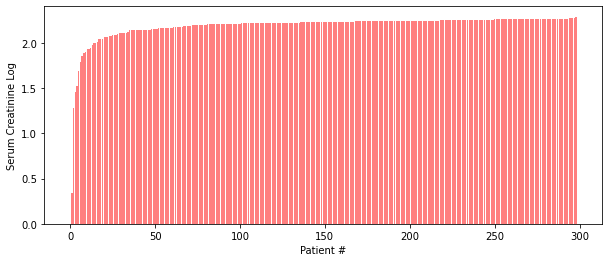

In [539]:
#create stacked bar chart for log transformation of sc

# sc_log_death.plot.bar(stacked=True)

plt.bar(range(len(sc_ef_de["sc_log"])), sorted(sc_ef_de["sc_log"]), color='red', alpha=0.5)
plt.rcParams['figure.figsize'] = [10, 4]
plt.xlabel("Patient #")
plt.ylabel("Serum Creatinine Log")
plt.show()

#did not work well

In [327]:
sc_ef_de.insert(len(sc_ef_de.columns), 'sc_sqrt',
         np.sqrt(sc_ef_de.iloc[:,0]))

In [328]:
sc_sqrt_death = sc_ef_de[["sc_sqrt","DEATH_EVENT"]]
sc_sqrt_death = pd.crosstab(sc_ef_de["sc_sqrt"], sc_ef_de["DEATH_EVENT"])
sc_sqrt_death

DEATH_EVENT,0,1
sc_sqrt,,
0.707107,1,0
0.774597,2,2
0.836660,18,1
0.866025,1,0
0.894427,23,1
0.948683,27,5
1.000000,35,15
1.048809,23,9
1.086278,11,0


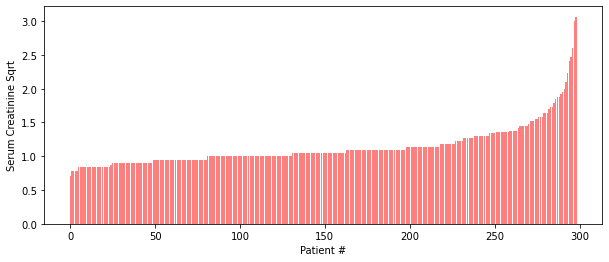

In [540]:
# sc_sqrt_death.plot.bar(stacked=True)
plt.bar(range(len(sc_ef_de["sc_sqrt"])), sorted(sc_ef_de["sc_sqrt"]), color='red', alpha=0.5)
plt.rcParams['figure.figsize'] = [5, 10]
plt.xlabel("Patient #")
plt.ylabel("Serum Creatinine Sqrt")
plt.show()


In [330]:
#Let's check skew again
sc_ef_de.agg(['skew', 'kurtosis']).transpose()

#the sqrt transformation improved the skew, but it is still high

,skew,kurtosis
serum_creatinine,4.455996,25.828239
ejection_fraction,0.555383,0.041409
DEATH_EVENT,0.770349,-1.416080
sc_log,-7.767018,73.035301
sc_sqrt,2.821052,11.007459


In [332]:
#Box-cox transformation
from scipy.stats import boxcox

sc_ef_de.insert(len(sc_ef_de.columns), 'sc_boxcox', 
              boxcox(sc_ef_de.iloc[:, 0])[0])



In [333]:
sc_box_death = sc_ef_de[["sc_boxcox","DEATH_EVENT"]]
sc_box_death = pd.crosstab(sc_ef_de["sc_boxcox"], sc_ef_de["DEATH_EVENT"])
sc_box_death

DEATH_EVENT,0,1
sc_boxcox,,
-0.996111,1,0
-0.664806,2,2
-0.427755,18,1
-0.332827,1,0
-0.249708,23,1
-0.111051,27,5
0.000000,35,15
0.090952,23,9
0.152666,11,0


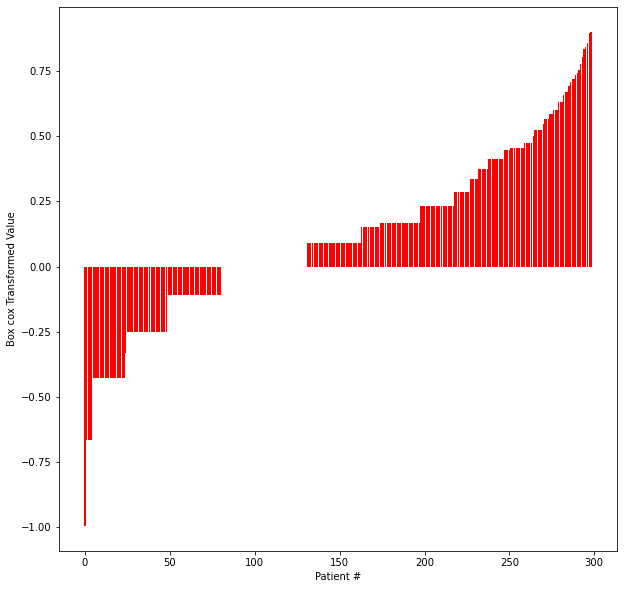

In [530]:


plt.bar(range(len(sc_ef_de["sc_boxcox"])), sorted(sc_ef_de["sc_boxcox"]), color='red', alpha=0.5)
plt.xlabel("Patient #")
plt.ylabel("Box cox Transformed Value")
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()


In [335]:
#Let's check skew again
sc_ef_de.agg(['skew', 'kurtosis']).transpose()

#the boxcox transformation fixes the skew

,skew,kurtosis
serum_creatinine,4.455996,25.828239
ejection_fraction,0.555383,0.041409
DEATH_EVENT,0.770349,-1.416080
sc_log,-7.767018,73.035301
sc_sqrt,2.821052,11.007459
sc_boxcox,0.021353,0.220403


In [336]:
sc_boxcox_mean = sc_ef_de['sc_boxcox'].mean()
sc_boxcox_std = sc_ef_de['sc_boxcox'].std()

print(sc_boxcox_mean)
print(sc_boxcox_std)

0.10966581506797773
0.31741161356019093


In [337]:
#boxcox train
x = sc_ef_de[['sc_boxcox','ejection_fraction']]
x

y = sc_ef_de['DEATH_EVENT']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [338]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred=logmodel.predict(X_test)

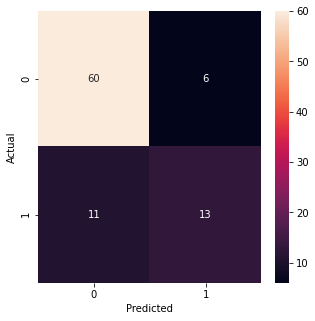

In [339]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [340]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8111111111111111


In [46]:
#find variance for each group
print(np.var(df_died['serum_creatinine']), np.var(df_lived['serum_creatinine']))

#We have significant variance again, so we need to set equal_val to false for our next step

2.134207638888889 0.42571661044917436


In [47]:
#Perform two-sample t-test to find significance of ef on death

stats.ttest_ind(a=df_died['serum_creatinine'], b=df_lived['serum_creatinine'], equal_var=False)

#We have a high t-statistic and low pvalue, so there is significant evidence to reject the null hypothesis yet again. 
#We can say that those who died have sc that is significantly different from those who lived.

Ttest_indResult(statistic=4.152639017521322, pvalue=6.398962339971595e-05)

In [82]:
#We want to also do a one tail t test to see if sc is significantly lower in those who died

test_2 = stats.ttest_1samp(df_died['serum_creatinine'], sc_lived_mean)

test_2

#We can still reject the null hypothesis with the one-tail t-test

Ttest_1sampResult(statistic=4.343055969857698, pvalue=3.5152947113179894e-05)

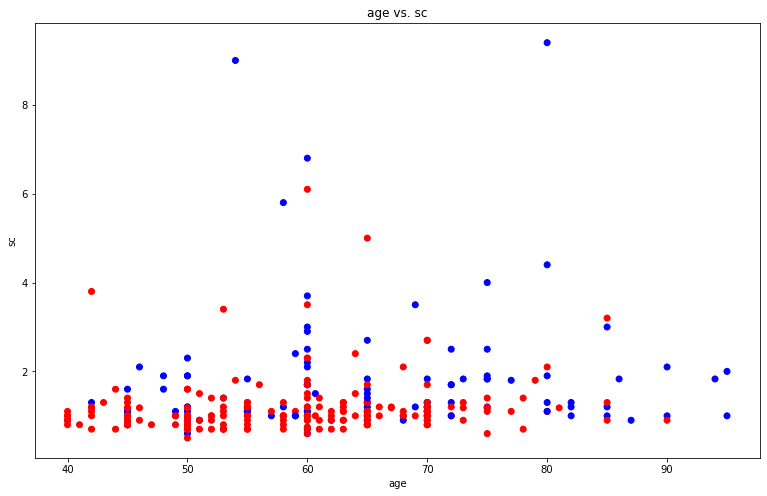

In [91]:
#Lets make some scatterplots looking at the whole dataframe and colorcoding accoring to death event

plt.rcParams['figure.figsize'] = [13, 8]
fig, ax = plt.subplots()

colors = {0:'red', 1:'blue'}

#age vs sc
ax.scatter(df['age'], df['serum_creatinine'], c=df['DEATH_EVENT'].map(colors))
plt.xlabel('age')
plt.ylabel('sc')
plt.title('age vs. sc')
plt.show()

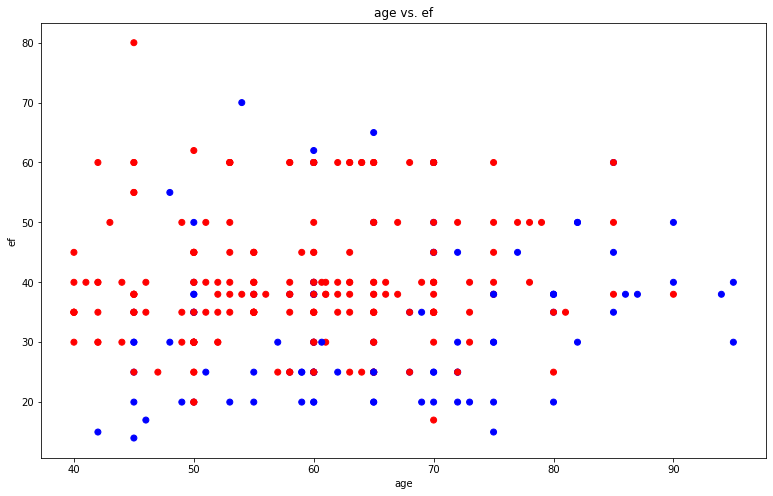

In [93]:
#age vs ef
fig, ax = plt.subplots()
ax.scatter(df['age'], df['ejection_fraction'], c=df['DEATH_EVENT'].map(colors))
plt.xlabel('age')
plt.ylabel('ef')
plt.title('age vs. ef')
plt.show()

TypeError: 'list' object is not callable

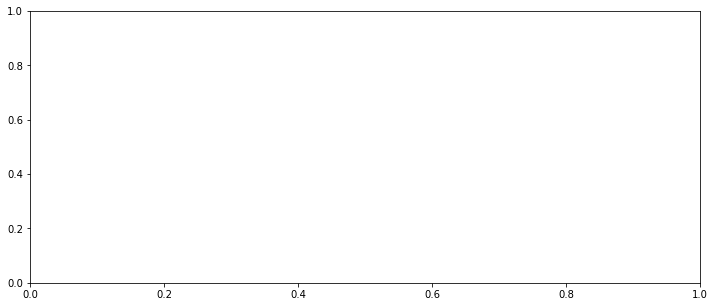

In [473]:
#sc vs ef
fig, ax = plt.subplots()
ax.scatter(df['serum_creatinine'], df['ejection_fraction'], c=df['DEATH_EVENT'].map(colors))

plt.xlabel('sc')
plt.ylabel('ef')
plt.title('sc vs. ef')
plt.show()

# x1 = df['serum_creatinine']
# y1 = df['ejection_fraction']

# stats.ttest_ind(a=df['serum_creatinine'],b=df['ejection_fraction'],equal_var=False)

#it looks like those who died had a higher sc and lower ef. Those who had high both died. Most of the people who
#lived are clustered around each other with medium to high ef and low sc. There are a lot of people who died
#that had a low ef but also a low sc

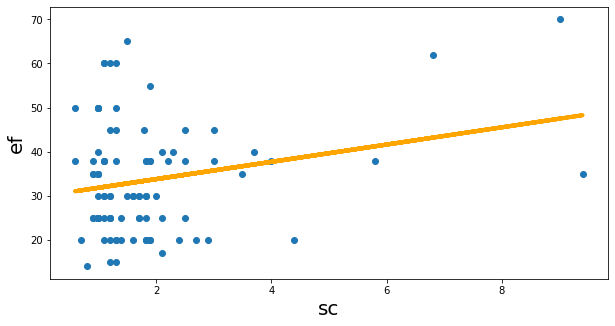

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ejection_fraction   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     5.228
Date:                Wed, 27 Oct 2021   Prob (F-statistic):             0.0245
Time:                        20:48:53   Log-Likelihood:                -375.78
No. Observations:                  96   AIC:                             755.6
Df Residuals:                      94   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               29.8748      2.009     14.872      0.000      25.886      33.863
serum_creatinine     1.9577      0.856      2.286      0.024       0.258       3.658
==============================================================================
Omnibus:                        7.698   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.105
Skew:                           0.707   Prob(JB):                       0.0174
Kurtosis:                       2.832   Cond. No.                         4.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [436]:
#Lets look at those who died on their own and plot with the regression line

x1 = df_died['serum_creatinine']
y1 = df_died['ejection_fraction']

plt.scatter(x1,y1)
yhat = 1.9577*x1 + 29.8748
fig = plt.plot(x1,yhat, lw=4, c='orange', label='regression line')
plt.xlabel('sc',fontsize=20)
plt.ylabel('ef',fontsize=20)
plt.show()

x = sm.add_constant(x1)
results = sm.OLS(y1,x).fit()
results.summary()

In [101]:
#We want to see if there is any correlation between the two so we will do a regression analysis
import statsmodels.api as sm

x = sm.add_constant(x1)
results = sm.OLS(y1,x).fit()
results.summary()

#obviously, when looking at r-squared and adjusted r-squared, we can see that there is not much of a correlation

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ejection_fraction   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     5.228
Date:                Mon, 25 Oct 2021   Prob (F-statistic):             0.0245
Time:                        18:58:16   Log-Likelihood:                -375.78
No. Observations:                  96   AIC:                             755.6
Df Residuals:                      94   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               29.8748      2.009     14.872      0.000      25.886      33.863
serum_creatinine     1.9577      0.856      2.286      0.024       0.258       3.658
==============================================================================
Omnibus:                        7.698   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.105
Skew:                           0.707   Prob(JB):                       0.0174
Kurtosis:                       2.832   Cond. No.                         4.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

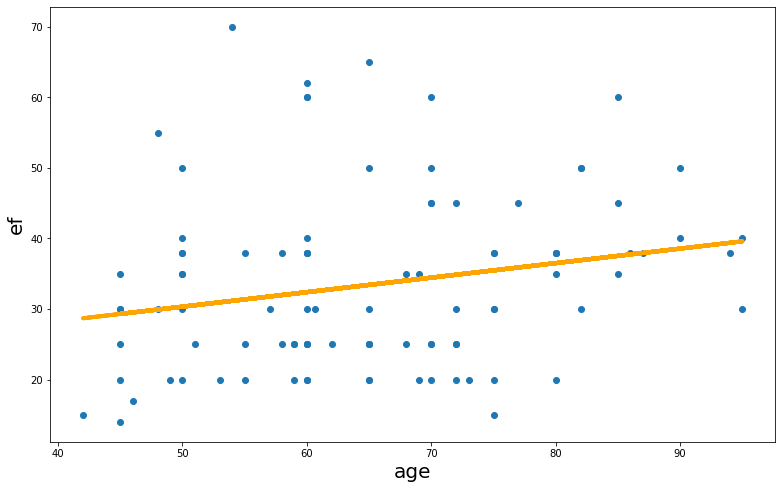

In [111]:
#Lets look at those who died with age and ef on their own and plot with the regression line

x1 = df_died['age']
y1 = df_died['ejection_fraction']

plt.scatter(x1,y1)
yhat = 0.2056*x1 + 20.0623
fig = plt.plot(x1,yhat, lw=4, c='orange', label='regression line')
plt.xlabel('age',fontsize=20)
plt.ylabel('ef',fontsize=20)
plt.show()

In [105]:
x = sm.add_constant(x1)
results = sm.OLS(y1,x).fit()
results.summary()

#again, no correlation between the two

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ejection_fraction   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     4.640
Date:                Mon, 25 Oct 2021   Prob (F-statistic):             0.0338
Time:                        19:18:26   Log-Likelihood:                -376.07
No. Observations:                  96   AIC:                             756.1
Df Residuals:                      94   BIC:                             761.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0623      6.349      3.160      0.002       7.456      32.668
age            0.2056      0.095      2.154      0.034       0.016       0.395
==============================================================================
Omnibus:                       14.871   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.489
Skew:                           0.967   Prob(JB):                     0.000263
Kurtosis:                       3.617   Cond. No.                         337.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

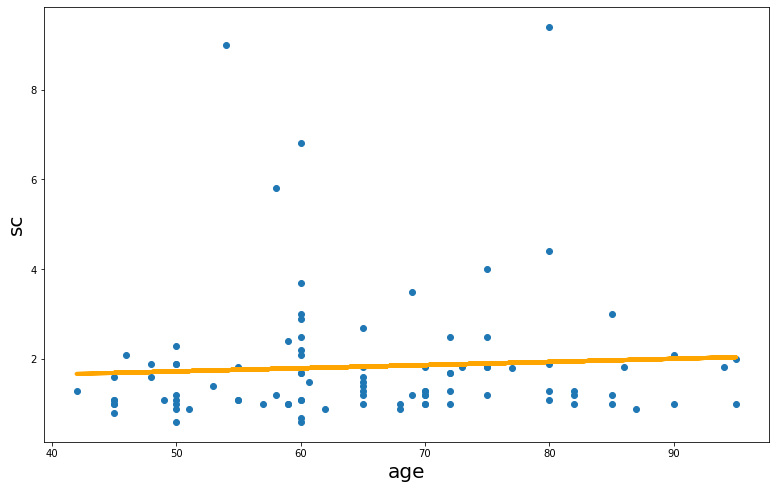

In [110]:
#Lets look at those who died with age and sc on their own and plot with the regression line

x1 = df_died['age']
y1 = df_died['serum_creatinine']

plt.scatter(x1,y1)
yhat = 0.007*x1 + 1.3777
fig = plt.plot(x1,yhat, lw=4, c='orange', label='regression line')
plt.xlabel('age',fontsize=20)
plt.ylabel('sc',fontsize=20)
plt.show()

In [109]:
x = sm.add_constant(x1)
results = sm.OLS(y1,x).fit()
results.summary()

#again, no correlation between the two

#As we can see, there is no significant correlation between any of our significant attributes among patients who died.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       serum_creatinine   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3772
Date:                Mon, 25 Oct 2021   Prob (F-statistic):              0.541
Time:                        19:20:00   Log-Likelihood:                -172.41
No. Observations:                  96   AIC:                             348.8
Df Residuals:                      94   BIC:                             354.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3777      0.761      1.810      0.073      -0.133       2.889
age            0.0070      0.011      0.614      0.541      -0.016       0.030
==============================================================================
Omnibus:                       94.970   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              833.069
Skew:                           3.363   Prob(JB):                    1.26e-181
Kurtosis:                      15.769   Cond. No.                         337.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

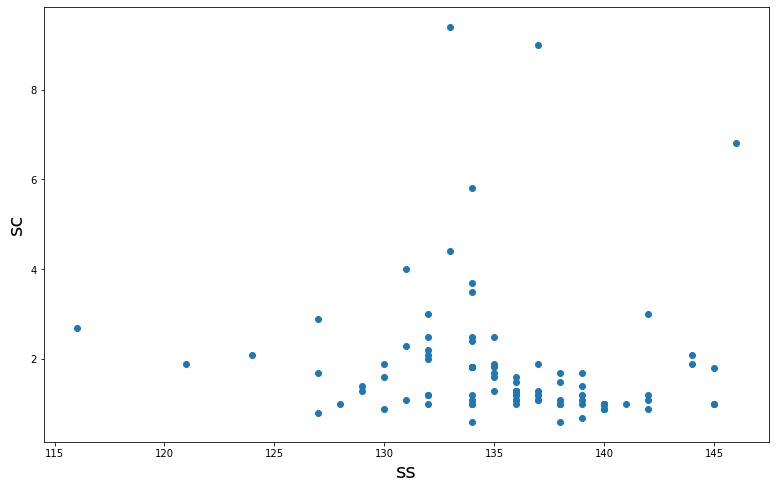

In [113]:
#Lets look at those who died with ss and sc on their own and plot with the regression line

x1 = df_died['serum_sodium']
y1 = df_died['serum_creatinine']

plt.scatter(x1,y1)
# yhat = 0.007*x1 + 1.3777
# fig = plt.plot(x1,yhat, lw=4, c='orange', label='regression line')
plt.xlabel('ss',fontsize=20)
plt.ylabel('sc',fontsize=20)
plt.show()

In [114]:
x = sm.add_constant(x1)
results = sm.OLS(y1,x).fit()
results.summary()

#again, no correlation between the two

#As we can see, there is no significant correlation between these significant attributes among patients who died.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       serum_creatinine   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8382
Date:                Mon, 25 Oct 2021   Prob (F-statistic):              0.362
Time:                        19:32:06   Log-Likelihood:                -172.18
No. Observations:                  96   AIC:                             348.4
Df Residuals:                      94   BIC:                             353.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.5727      4.084      1.364      0.176      -2.537      13.682
serum_sodium    -0.0276      0.030     -0.916      0.362      -0.087       0.032
==============================================================================
Omnibus:                       97.017   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              888.687
Skew:                           3.446   Prob(JB):                    1.06e-193
Kurtosis:                      16.217   Cond. No.                     3.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

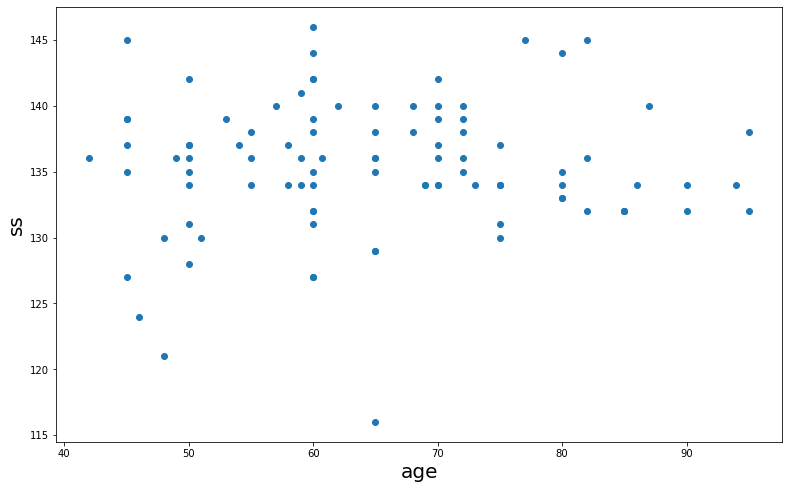

In [115]:

x1 = df_died['age']
y1 = df_died['serum_sodium']

plt.scatter(x1,y1)

plt.xlabel('age',fontsize=20)
plt.ylabel('ss',fontsize=20)
plt.show()

In [116]:
x = sm.add_constant(x1)
results = sm.OLS(y1,x).fit()
results.summary()

#again, no correlation between the two

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           serum_sodium   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1186
Date:                Mon, 25 Oct 2021   Prob (F-statistic):              0.731
Time:                        19:33:24   Log-Likelihood:                -290.19
No. Observations:                  96   AIC:                             584.4
Df Residuals:                      94   BIC:                             589.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.4987      2.595     51.821      0.000     129.345     139.652
age            0.0134      0.039      0.344      0.731      -0.064       0.091
==============================================================================
Omnibus:                       13.641   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.001
Skew:                          -0.639   Prob(JB):                     4.54e-05
Kurtosis:                       4.836   Cond. No.                         337.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

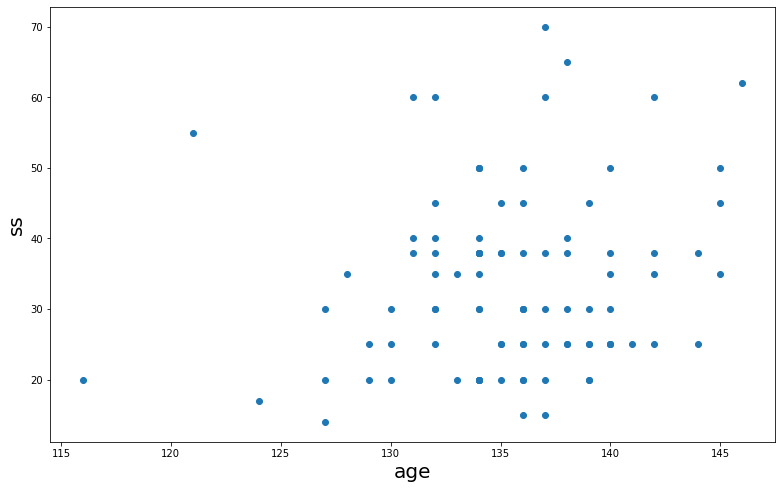

In [117]:
x1 = df_died['serum_sodium']
y1 = df_died['ejection_fraction']

plt.scatter(x1,y1)
# yhat = 0.007*x1 + 1.3777
# fig = plt.plot(x1,yhat, lw=4, c='orange', label='regression line')
plt.xlabel('age',fontsize=20)
plt.ylabel('ss',fontsize=20)
plt.show()

In [118]:
x = sm.add_constant(x1)
results = sm.OLS(y1,x).fit()
results.summary()

#again, no correlation between the two

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ejection_fraction   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.892
Date:                Mon, 25 Oct 2021   Prob (F-statistic):             0.0923
Time:                        19:35:07   Log-Likelihood:                -376.93
No. Observations:                  96   AIC:                             757.9
Df Residuals:                      94   BIC:                             763.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -25.0974     34.464     -0.728      0.468     -93.527      43.332
serum_sodium     0.4326      0.254      1.700      0.092      -0.073       0.938
==============================================================================
Omnibus:                       10.787   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.487
Skew:                           0.843   Prob(JB):                      0.00320
Kurtosis:                       3.163   Cond. No.                     3.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# results thus far:

##### We have discovered that serum creatinine and age are statistically significant for determining whether a patient lives or dies, with each of these being higher on average for those who died vs. lived. We have also discovered that ejection fraction is statistically significant with it being lower on average for those who died. Addtionally, we found that lower serum sodium is correlated with death.



##### However, based on the regression analysis, we have found that although all of these attributes are significant with regards to patient death, none of them are significant to each other. The r-squared value of each pair of significant attributes was very low, thus these prediction models are not appropriate for this data set. For example, there was no relationship between a patient's age and their levels of serum creatinine, thus it is not appropriate to use age as a predictor for this attribute. 

In [140]:
#Lets create two dataframes - one for those who died and one for those who lived

lived_df = df[df['DEATH_EVENT'] == 0]

lived_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
33,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29,0
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0


In [141]:
died_df = df[df['DEATH_EVENT'] == 1]

died_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
230,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1
246,55.0,0,2017,0,25,0,314000.00,1.10,138,1,0,214,1
262,65.0,1,258,1,25,0,198000.00,1.40,129,1,0,235,1


<Figure size 360x360 with 0 Axes>

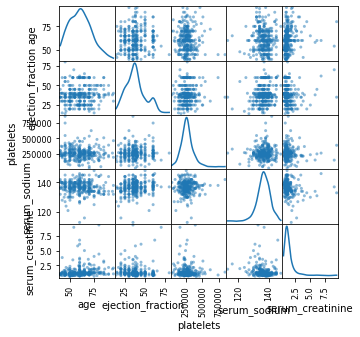

In [189]:
from pandas.plotting import scatter_matrix

plt.figure()
scatter_matrix(df[["age","ejection_fraction","platelets",'serum_sodium','serum_creatinine']],diagonal="kde")
plt.show()

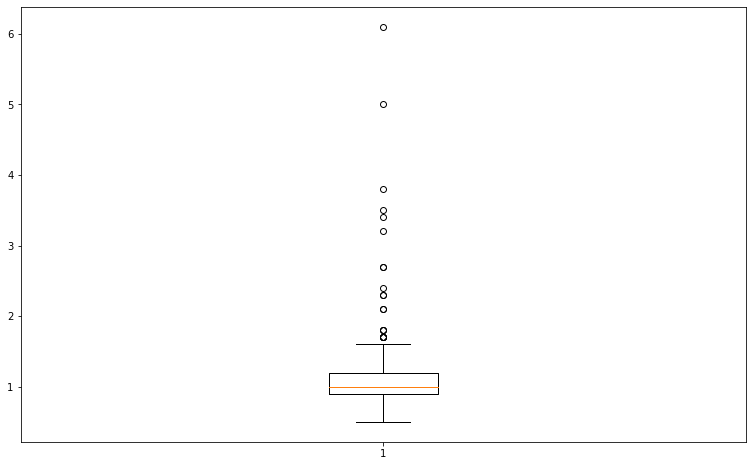

In [149]:
#Lets make two boxplots to look at sc

# Creating plot
plt.boxplot(lived_df['serum_creatinine'])
 
# show plot
plt.show()

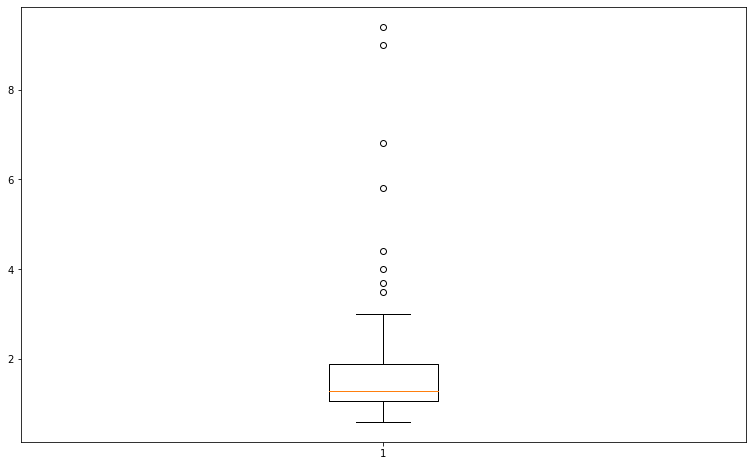

In [150]:
# Creating plot
plt.boxplot(died_df['serum_creatinine'])
 
# show plot
plt.show()

#The range for those who died is greater

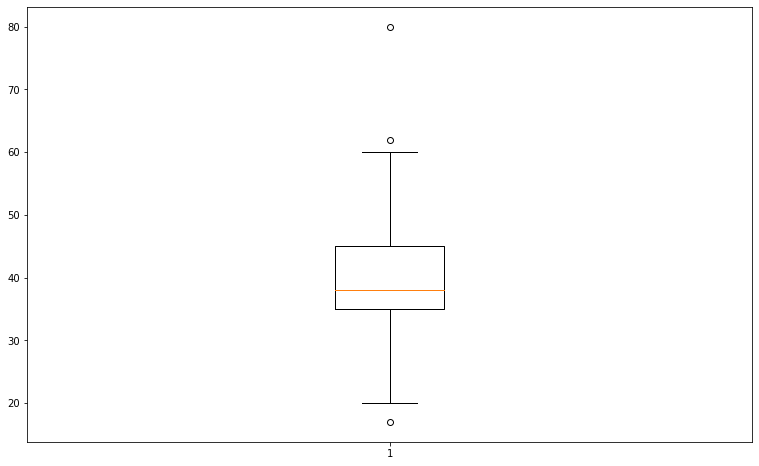

In [151]:
#Lets make two boxplots for ejection_fraction

# Creating plot
plt.boxplot(lived_df['ejection_fraction'])
 
# show plot
plt.show()

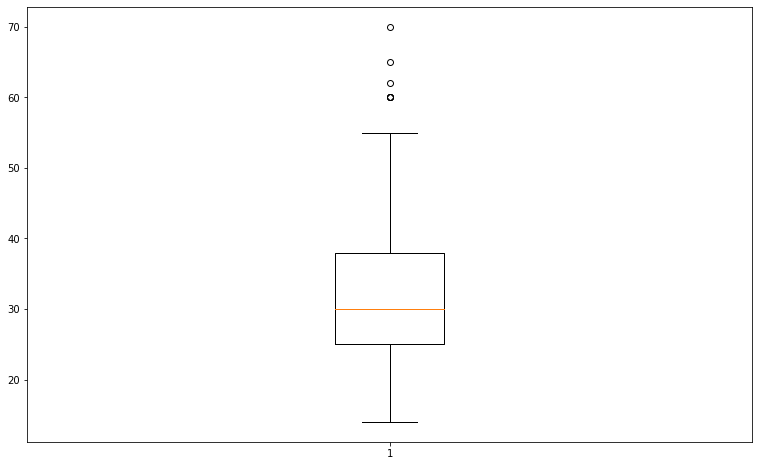

In [152]:
# Creating plot
plt.boxplot(died_df['ejection_fraction'])
 
# show plot
plt.show()

#range for died is lower

In [174]:
from sklearn.cluster import KMeans

#We are going to make k-means clusters based on age and ejection fraction as they are our most significant attributes:

# k means
kmeans = KMeans(n_clusters=3, random_state=0)
died_df['cluster'] = kmeans.fit_predict(died_df[['ejection_fraction', 'age']])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
# cen_z = [i[2] for i in centroids]

## add to df
died_df['cen_x'] = died_df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
died_df['cen_y'] = died_df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# died_df['cen_z'] = died_df.cluster.map({0:cen_z[0], 1:cen_z[1], 2:cen_z[2]})

# define and map colors
colors = ['red', 'green', 'blue']
died_df['c'] = died_df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

<ipython-input-174-0bc6ec40a7c8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  died_df['cluster'] = kmeans.fit_predict(died_df[['ejection_fraction', 'age']])
<ipython-input-174-0bc6ec40a7c8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  died_df['cen_x'] = died_df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
<ipython-input-174-0bc6ec40a7c8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

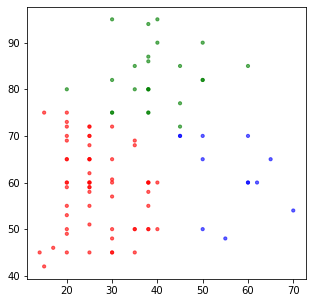

In [175]:
# fig = plt.figure(figsize=(26,6))
# ax = fig.add_subplot(131, projection='3d')
# ax.scatter(died_df.ejection_fraction, died_df.serum_creatinine, died_df.age, c=died_df.c, s=15)

# ax.set_xlabel('EF')
# ax.set_ylabel('SC')
# ax.set_zlabel('age')
# plt.show()

plt.scatter(died_df.ejection_fraction, died_df.age, c=died_df.c, alpha = 0.6, s=10)

#We created our k-means clusters to find related data points among those who died with regards to ef and age
#It seems that there are a lot of younger people with a low ef who died vs a lot of older people with a higher ef
#who also died. However, there is also a group that seems to be younger and have a high ef, so we need to find out what 
#is causing those people to die.

### According to our clusters, it looks like people were either young and had low ef, old and had a higher ef, or young with a high ef. We want to look at the blue group of younger patients with a high ef to see if sc caused their death 

In [176]:
#let's look at the blue group and see if we can figure out why they died

blue_group = died_df[died_df['c'] == 'blue']

blue_group

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,cluster,cen_x,cen_y,c
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1,2,56.0,61.833333,blue
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1,2,56.0,61.833333,blue
19,48.0,1,582,1,55,0,87000.00,1.9,121,0,0,15,1,2,56.0,61.833333,blue
27,70.0,0,122,1,45,1,284000.00,1.3,136,1,1,26,1,2,56.0,61.833333,blue
34,65.0,0,94,1,50,1,188000.00,1.0,140,1,0,29,1,2,56.0,61.833333,blue
42,70.0,0,571,1,45,1,185000.00,1.2,139,1,1,33,1,2,56.0,61.833333,blue
44,60.0,1,588,1,60,0,194000.00,1.1,142,0,0,33,1,2,56.0,61.833333,blue
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1,2,56.0,61.833333,blue
53,70.0,1,69,1,50,1,351000.00,1.0,134,0,0,44,1,2,56.0,61.833333,blue
113,70.0,1,143,0,60,0,351000.00,1.3,137,0,0,90,1,2,56.0,61.833333,blue


In [158]:
bg_sc_mean = blue_group['serum_creatinine'].mean()
ddf_sc_mean = died_df['serum_creatinine'].mean()

print(bg_sc_mean)
print(ddf_sc_mean)

#It looks like the sc for the blue group is a bit higher. We will perform some tests

2.316666666666667
1.8358333333333332


In [160]:
#We want to also do a one tail t test to see if sc is significantly higher in the blue group

test_bg = stats.ttest_1samp(blue_group['serum_creatinine'], ddf_sc_mean)

test_bg

#There is no statistical significance, we cannot reject the null hypothesis

Ttest_1sampResult(statistic=0.6243238072278252, pvalue=0.5451457958123228)

In [163]:
#We want to also do a one tail t test to see if ss is significantly higher in those who died

ddf_ss_mean = died_df['serum_sodium'].mean()

print(ddf_ss_mean)

test_ss = stats.ttest_1samp(blue_group['serum_sodium'], ddf_ss_mean)

test_ss

#Again, we do not have significant evidence as to what caused the blue group to die

135.375


Ttest_1sampResult(statistic=0.48807222433745523, pvalue=0.6350818061602355)

In [177]:
#Upon inspecting blue_group, I noticed a lot of people have diabetes. Let's look at it

#Lets look at diabetes vs. color group in df_died

diabetes_bg_death = died_df[["diabetes","c"]]
diabetes_bg_death = pd.crosstab(died_df["diabetes"], died_df["c"])
diabetes_bg_death

#There looks to be a lot of people with diabetes within the blue group

c,blue,green,red
diabetes,,,
0,4,17,35
1,8,7,25


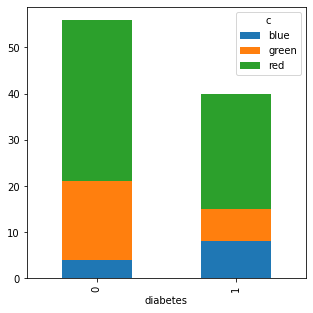

In [178]:
#Let's make a bar chart
plt.rcParams['figure.figsize'] = [5, 5]
diabetes_bg_death.plot.bar(stacked=True)
plt.show()

#the blue group's ratio of diabetes vs. not is very different from the other two groups. There are twice as many 
#people with diabetes vs. not whereas the other groups have less diabetes 

In [188]:
#Let's do the chi square test

chisqt = pd.crosstab(died_df.diabetes, died_df.c, margins=True)
value = np.array([chisqt.iloc[0][0:3].values,
                  chisqt.iloc[1][0:3].values])
print(chi2_contingency(value)[0:3])

#We can't flat-out reject the null hypothesis, but it does look like there is a bit of a difference. It is more
#significant than the serum creatinine, at least

(4.628571428571429, 0.09883675647787385, 2)
